## Import the needed Libraries

In [43]:
import uproot
import awkward as ak
import mplhep
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt

## Load MC simulation data
Data is stored in same folder as the nb.

In [74]:
### Open the files 
file_ee = uproot.open('ee.root')
ttree_name_ee = 'myTTree'

file_mm = uproot.open('mm.root')
ttree_name_mm = 'myTTree'

file_qq = uproot.open('qq.root')
ttree_name_qq = 'myTTree'

file_tt = uproot.open('tt.root')
ttree_name_tt = 'myTTree'

### Print list of 'branches' of the TTree (i.e. list of variable names)
print('list of parameters ee:')
print('ee',file_ee[ttree_name_ee].keys())
print()
print('mm', file_mm[ttree_name_mm].keys())
print()
print('qq', file_qq[ttree_name_qq].keys())
print()
print('tt', file_tt[ttree_name_tt].keys())
print('________________________________________')

## Load branches
branches_ee = file_ee[ttree_name_ee].arrays()
branches_mm = file_mm[ttree_name_mm].arrays()
branches_qq = file_qq[ttree_name_qq].arrays()
branches_tt = file_tt[ttree_name_tt].arrays()

## Define an numpy array for 'Pcharged' for the 4 channels
var_Pcharged = 'Pcharged'
pchar_ee = ak.to_numpy(branches_ee[var_Pcharged]) # See Docu (https://awkward-array.org/how-to-convert-numpy.html) for more conversions
pchar_mm = ak.to_numpy(branches_mm[var_Pcharged])
pchar_qq = ak.to_numpy(branches_qq[var_Pcharged])
pchar_tt = ak.to_numpy(branches_tt[var_Pcharged])


print(f"\n\nArrays of type '{type(pchar)}' defined for '{var}':\n\nee {pchar_ee} min: {pchar_ee.min()}, max: {pchar_ee.max()}")
print(f'mm {pchar_mm} min: {pchar_mm.min()}, max: {pchar_mm.max()}')
print(f'qq {pchar_qq} min: {pchar_qq.min()}, max: {pchar_qq.max()}')
print(f'tt {pchar_tt} min: {pchar_tt.min()}, max: {pchar_tt.max()}')
print()

## Define an numpy array for 'Ncharged' for the 4 channels
var_Ncharged = 'Ncharged'
nchar_ee = ak.to_numpy(branches_ee[var_Ncharged]) # See Docu (https://awkward-array.org/how-to-convert-numpy.html) for more conversions
nchar_mm = ak.to_numpy(branches_mm[var_Ncharged])
nchar_qq = ak.to_numpy(branches_qq[var_Ncharged])
nchar_tt = ak.to_numpy(branches_tt[var_Ncharged])


print(f"\n\nArrays of type '{type(nchar_ee)}' defined for '{var_Ncharged}':\n")
print(f"ee {nchar_ee} min: {nchar_ee.min()}, max: {nchar_ee.max()}")
print(f'mm {nchar_mm} min: {nchar_mm.min()}, max: {nchar_mm.max()}')
print(f'qq {nchar_qq} min: {nchar_qq.min()}, max: {nchar_qq.max()}')
print(f'tt {nchar_tt} min: {nchar_tt.min()}, max: {nchar_tt.max()}')
print()

## Define an numpy array for 'E_ecal' for the 4 channels
var_E_ecal = 'E_ecal'
E_ecal_ee = ak.to_numpy(branches_ee[var_E_ecal]) # See Docu (https://awkward-array.org/how-to-convert-numpy.html) for more conversions
E_ecal_mm = ak.to_numpy(branches_mm[var_E_ecal])
E_ecal_qq = ak.to_numpy(branches_qq[var_E_ecal])
E_ecal_tt = ak.to_numpy(branches_tt[var_E_ecal])


print(f"\n\nArrays of type '{type(E_ecal_ee)}' defined for '{var_E_ecal}':\n")
print(f"ee {E_ecal_ee} min: {E_ecal_ee.min()}, max: {E_ecal_ee.max()}")
print(f'mm {E_ecal_mm} min: {E_ecal_mm.min()}, max: {E_ecal_mm.max()}')
print(f'qq {E_ecal_qq} min: {E_ecal_qq.min()}, max: {E_ecal_qq.max()}')
print(f'tt {E_ecal_tt} min: {E_ecal_tt.min()}, max: {E_ecal_tt.max()}')
print()

## Define an numpy array for 'E_hcal' for the 4 channels
var_E_hcal = 'E_hcal'
E_hcal_ee = ak.to_numpy(branches_ee[var_E_hcal]) # See Docu (https://awkward-array.org/how-to-convert-numpy.html) for more conversions
E_hcal_mm = ak.to_numpy(branches_mm[var_E_hcal])
E_hcal_qq = ak.to_numpy(branches_qq[var_E_hcal])
E_hcal_tt = ak.to_numpy(branches_tt[var_E_hcal])


print(f"\n\nArrays of type '{type(E_hcal_ee)}' defined for '{var_E_hcal}':\n")
print(f"ee {E_hcal_ee} min: {E_hcal_ee.min()}, max: {E_hcal_ee.max()}")
print(f'mm {E_hcal_mm} min: {E_hcal_mm.min()}, max: {E_hcal_mm.max()}')
print(f'qq {E_hcal_qq} min: {E_hcal_qq.min()}, max: {E_hcal_qq.max()}')
print(f'tt {E_hcal_tt} min: {E_hcal_tt.min()}, max: {E_hcal_tt.max()}')
print()

## Define an numpy array for 'cos_thet' for the 4 channels
var_cos_thet = 'cos_thet'
cos_thet_ee = ak.to_numpy(branches_ee[var_cos_thet]) # See Docu (https://awkward-array.org/how-to-convert-numpy.html) for more conversions
cos_thet_mm = ak.to_numpy(branches_mm[var_cos_thet])
cos_thet_qq = ak.to_numpy(branches_qq[var_cos_thet])
cos_thet_tt = ak.to_numpy(branches_tt[var_cos_thet])


print(f"\n\nArrays of type '{type(cos_thet_ee)}' defined for '{cos_thet_ee}':\n")
print(f"ee {cos_thet_ee} min: {cos_thet_ee.min()}, max: {cos_thet_ee.max()}")
print(f'mm {cos_thet_mm} min: {cos_thet_mm.min()}, max: {cos_thet_mm.max()}')
print(f'qq {cos_thet_qq} min: {cos_thet_qq.min()}, max: {cos_thet_qq.max()}')
print(f'tt {cos_thet_tt} min: {cos_thet_tt.min()}, max: {cos_thet_tt.max()}')
print()

list of parameters ee:
ee ['run', 'event', 'Ncharged', 'Pcharged', 'E_ecal', 'E_hcal', 'E_lep', 'cos_thru', 'cos_thet']

mm ['run', 'event', 'Ncharged', 'Pcharged', 'E_ecal', 'E_hcal', 'E_lep', 'cos_thru', 'cos_thet']

qq ['run', 'event', 'Ncharged', 'Pcharged', 'E_ecal', 'E_hcal', 'E_lep', 'cos_thru', 'cos_thet']

tt ['run', 'event', 'Ncharged', 'Pcharged', 'E_ecal', 'E_hcal', 'E_lep', 'cos_thru', 'cos_thet']
________________________________________


Arrays of type '<class 'numpy.ndarray'>' defined for 'Pcharged':

ee [81.32794  71.334854  0.       ... 73.69003  81.64756  80.798645] min: 0.0, max: 55299.58984375
mm [63.769375 87.26109  89.692245 ... 87.108574 94.00878  88.81888 ] min: 0.0, max: 73101.0546875
qq [36.15152  62.90951  66.66082  ... 65.85204  56.341167 68.896835] min: 0.0, max: 45531.8671875
tt [25.156181 21.133148 59.023323 ... 33.127083 54.095062 17.629349] min: 0.0, max: 719342.8125



Arrays of type '<class 'numpy.ndarray'>' defined for 'Ncharged':

ee [2. 2. 0. ... 

## Plot the data to find where to cut

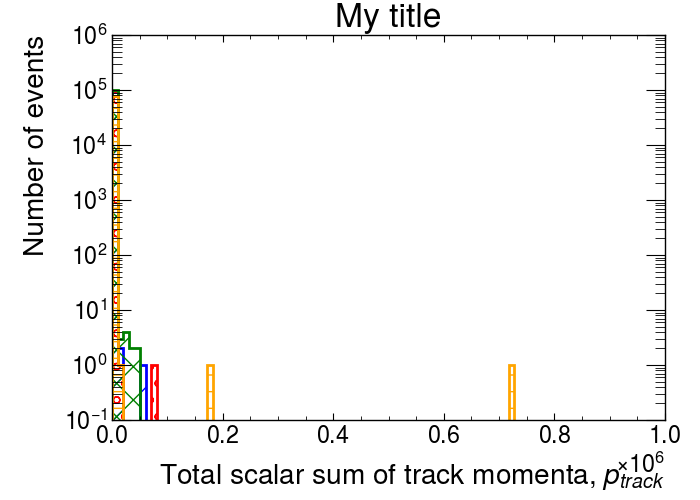

In [114]:
bins_pchar = np.linspace(0, 1000000, 100)

plt.style.use(mplhep.style.ATLAS) # You can load ATLAS/CMS/ALICE plot style 
plt.figure(figsize=(7,5))

bin_content_ee, bin_edges_ee, _ = plt.hist(pchar_ee,bins=bins_pchar, histtype='step',  linewidth=2, edgecolor='b', hatch='/', label='Pcharged')
mid_ee = 0.5*(bin_edges[1:] + bin_edges[:-1]) #Calculate midpoint of the bars

bin_content_mm, bin_edges_mm, _ = plt.hist(pchar_mm,bins=bins_pchar, histtype='step',  linewidth=2, edgecolor='r', hatch='o', label='Pcharged')
mid_mm = 0.5*(bin_edges[1:] + bin_edges[:-1]) #Calculate midpoint of the bars

bin_content_qq, bin_edges_qq, _ = plt.hist(pchar_qq,bins=bins_pchar, histtype='step',  linewidth=2, edgecolor='green', hatch='x', label='Pcharged')
mid_qq = 0.5*(bin_edges[1:] + bin_edges[:-1]) #Calculate midpoint of the bars

bin_content_tt, bin_edges_tt, _ = plt.hist(pchar_tt,bins=bins_pchar, histtype='step',  linewidth=2, edgecolor='orange', hatch='-', label='Pcharged')
mid_tt = 0.5*(bin_edges[1:] + bin_edges[:-1]) #Calculate midpoint of the bars


error_sizes = np.sqrt(bin_content)

#plt.errorbar(mid, bin_content, yerr=error_sizes, fmt='none')
### When producing an histogram, you can store the bin content and the edges of the bins in 
###'bin_content', and 'bin_edges' 
#print(bin_content)
#print(bin_edges)

### Show the plot on screen
plt.title('My title')
#plt.xlim(10.,150.)
plt.yscale('log')
#plt.xscale('log')
plt.xlabel('Total scalar sum of track momenta, $p_{track}$')
plt.ylabel('Number of events')
plt.show()


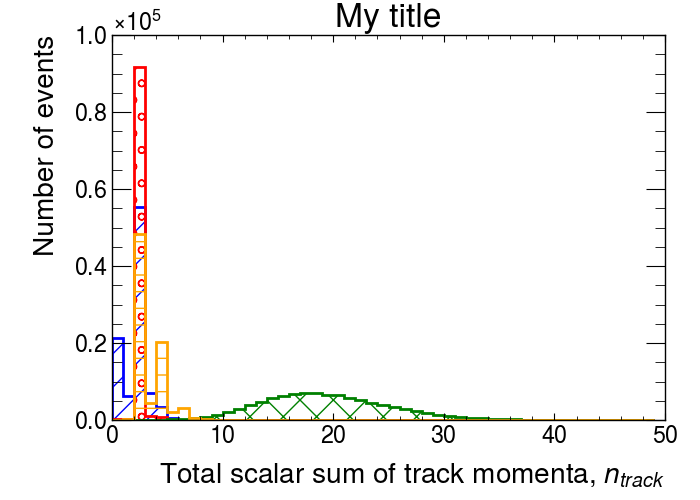

In [98]:

bins_nchar = np.linspace(0,49, 50)

plt.style.use(mplhep.style.ATLAS) # You can load ATLAS/CMS/ALICE plot style 
plt.figure(figsize=(7,5))


bin_content_ee, bin_edges_ee, _ = plt.hist(nchar_ee,bins=bins_nchar, histtype='step',  linewidth=2, edgecolor='b', hatch='/', label='Pcharged')
mid_ee = 0.5*(bin_edges[1:] + bin_edges[:-1]) #Calculate midpoint of the bars

bin_content_mm, bin_edges_mm, _ = plt.hist(nchar_mm,bins=bins_nchar, histtype='step',  linewidth=2, edgecolor='r', hatch='o', label='Pcharged')
mid_mm = 0.5*(bin_edges[1:] + bin_edges[:-1]) #Calculate midpoint of the bars

bin_content_qq, bin_edges_qq, _ = plt.hist(nchar_qq,bins=bins_nchar, histtype='step',  linewidth=2, edgecolor='green', hatch='x', label='Pcharged')
mid_qq = 0.5*(bin_edges[1:] + bin_edges[:-1]) #Calculate midpoint of the bars

bin_content_tt, bin_edges_tt, _ = plt.hist(nchar_tt,bins=bins_nchar, histtype='step',  linewidth=2, edgecolor='orange', hatch='-', label='Pcharged')
mid_tt = 0.5*(bin_edges[1:] + bin_edges[:-1]) #Calculate midpoint of the bars


error_sizes = np.sqrt(bin_content)

#plt.errorbar(mid, bin_content, yerr=error_sizes, fmt='none')
### When producing an histogram, you can store the bin content and the edges of the bins in 
###'bin_content', and 'bin_edges' 
#print(bin_content)
#print(bin_edges)

### Show the plot on screen
plt.title('My title')
#plt.xlim(10.,150.)
#plt.yscale('log')
#plt.xscale('log')
plt.xlabel('Total scalar sum of track momenta, $n_{track}$')
plt.ylabel('Number of events')
plt.show()

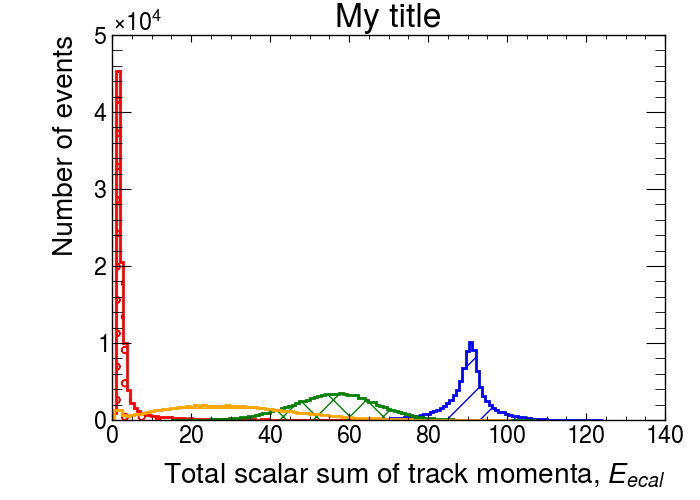

In [82]:
plt.style.use(mplhep.style.ATLAS) # You can load ATLAS/CMS/ALICE plot style 
plt.figure(figsize=(7,5))

bin_content_ee, bin_edges_ee, _ = plt.hist(E_ecal_ee,bins=100, histtype='step',  linewidth=2, edgecolor='b', hatch='/', label='Pcharged')
mid_ee = 0.5*(bin_edges[1:] + bin_edges[:-1]) #Calculate midpoint of the bars

bin_content_mm, bin_edges_mm, _ = plt.hist(E_ecal_mm,bins=100, histtype='step',  linewidth=2, edgecolor='r', hatch='o', label='Pcharged')
mid_mm = 0.5*(bin_edges[1:] + bin_edges[:-1]) #Calculate midpoint of the bars

bin_content_qq, bin_edges_qq, _ = plt.hist(E_ecal_qq,bins=100, histtype='step',  linewidth=2, edgecolor='green', hatch='x', label='Pcharged')
mid_qq = 0.5*(bin_edges[1:] + bin_edges[:-1]) #Calculate midpoint of the bars

bin_content_tt, bin_edges_tt, _ = plt.hist(E_ecal_tt,bins=100, histtype='step',  linewidth=2, edgecolor='orange', hatch='-', label='Pcharged')
mid_tt = 0.5*(bin_edges[1:] + bin_edges[:-1]) #Calculate midpoint of the bars


error_sizes = np.sqrt(bin_content)

#plt.errorbar(mid, bin_content, yerr=error_sizes, fmt='none')
### When producing an histogram, you can store the bin content and the edges of the bins in 
###'bin_content', and 'bin_edges' 
#print(bin_content)
#print(bin_edges)

### Show the plot on screen
plt.title('My title')
#plt.xlim(10.,150.)
#plt.yscale('log')
#plt.xscale('log')
plt.xlabel('Total scalar sum of track momenta, $E_{ecal}$')
plt.ylabel('Number of events')
plt.show()

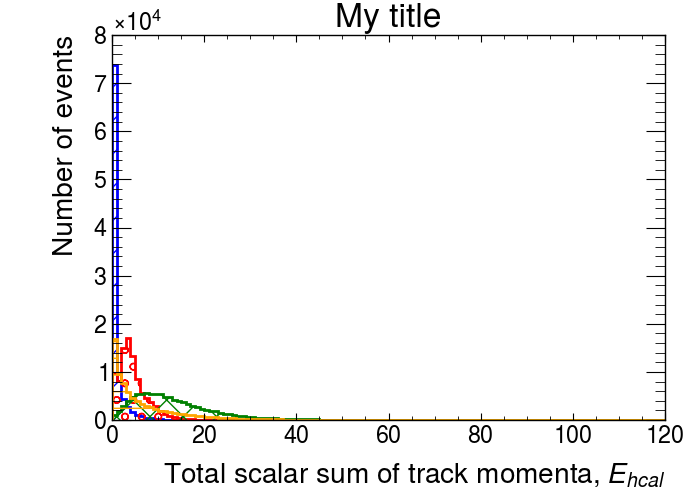

In [118]:
bins_Ehcal = np.linspace(0, 120, 121)


plt.style.use(mplhep.style.ATLAS) # You can load ATLAS/CMS/ALICE plot style 
plt.figure(figsize=(7,5))

bin_content_ee, bin_edges_ee, _ = plt.hist(E_hcal_ee,bins=bins_Ehcal, histtype='step',  linewidth=2, edgecolor='b', hatch='/', label='Pcharged')
mid_ee = 0.5*(bin_edges[1:] + bin_edges[:-1]) #Calculate midpoint of the bars

bin_content_mm, bin_edges_mm, _ = plt.hist(E_hcal_mm,bins=bins_Ehcal, histtype='step',  linewidth=2, edgecolor='r', hatch='o', label='Pcharged')
mid_mm = 0.5*(bin_edges[1:] + bin_edges[:-1]) #Calculate midpoint of the bars

bin_content_qq, bin_edges_qq, _ = plt.hist(E_hcal_qq,bins=bins_Ehcal, histtype='step',  linewidth=2, edgecolor='green', hatch='x', label='Pcharged')
mid_qq = 0.5*(bin_edges[1:] + bin_edges[:-1]) #Calculate midpoint of the bars

bin_content_tt, bin_edges_tt, _ = plt.hist(E_hcal_tt,bins=bins_Ehcal, histtype='step',  linewidth=2, edgecolor='orange', hatch='-', label='Pcharged')
mid_tt = 0.5*(bin_edges[1:] + bin_edges[:-1]) #Calculate midpoint of the bars


error_sizes = np.sqrt(bin_content)

#plt.errorbar(mid, bin_content, yerr=error_sizes, fmt='none')
### When producing an histogram, you can store the bin content and the edges of the bins in 
###'bin_content', and 'bin_edges' 
#print(bin_content)
#print(bin_edges)

### Show the plot on screen
plt.title('My title')
#plt.xlim(10.,150.)
#plt.yscale('log')
#plt.xscale('log')
plt.xlabel('Total scalar sum of track momenta, $E_{hcal}$')
plt.ylabel('Number of events')
plt.show()